<a href="https://colab.research.google.com/github/dveksler02/dveksler02.github.io/blob/main/Boxplots_DS105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving amazon_reviews.csv to amazon_reviews (1).csv
Enter the keywords separated by commas:battery,bluetooth,grip,clicks,scroll,smooth,texture,weight


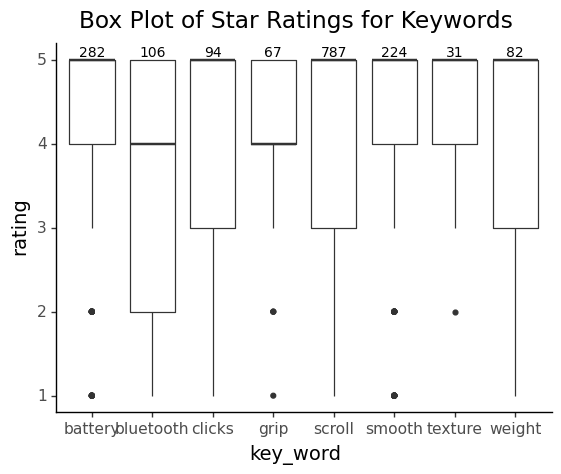

In [2]:
# importing libraries
import numpy
import pandas as pd
import plotnine as p9
from plotnine import *
from google.colab import files 

# enabling the upload of cleaned data csv to colab (not needed if colab isn't being used)
uploaded = files.upload()

# creating a dataframe from csv file 'amazon_reviews.csv'
df = pd.read_csv('amazon_reviews.csv')

# getting user input for keywords we want investigated
key_words = input("Enter the keywords separated by commas:")

# splitting the keywords by comma and storing them as a list
key_words = key_words.split(',')

# creating an empty dictionary
values = {}

# looping through the list of keywords
for key_word in key_words:
    # initialising an empty list for the values of the current keyword in each iteration
    values[key_word] = []
    
    # looping through each row in the dataframe (required this specific loop)
    for _, line in df.iterrows():
        # checking if the current keyword is present in the 'Review' cell of the current row
        if key_word in str(line["Review"]):
            # if the keyword is present, append the 'Star Rating' value to the list of values for the keyword
            values[key_word].append(line["Star Rating"])
    
    # checking if the values length for the keyword is greater than 0
    if len(values[key_word]) > 0:
        # if the length > 0, convert the list of values to a numpy array of type float
        values[key_word] = numpy.array(values[key_word], dtype=float)
    else:
        # if the length is 0, delete the current keyword from the dictionary
        del values[key_word]

# checking if the dictionary of values is empty
if len(values) == 0:
    # if the dictionary is empty, print a message telling user that there are no reviews with the keyword
    print("No keywords found in the Reviews column.")
# if dictionary of values isn't empty i.e keyword is mentioned in reviews, continue creating boxplots
else:
    # creating a dataframe for each keyword in the dictionary of values
    data = [pd.DataFrame({'key_word': [key_word] * len(values[key_word]), 'rating': values[key_word]}) for key_word in values]
    
    # concatenating the dataframes into a single dataframe
    data = pd.concat(data)
    
    # creating boxplots of the 'rating' values for each 'key_word' using plotnine
    g = (ggplot(data)
         # adding axis
         + aes(x='key_word', y='rating')
         # creating actual boxplots
         + geom_boxplot()
         # making the background white
         + theme_classic(base_size=14, base_family='Arial')
         # adding a title
         + ggtitle('Box Plot of Star Ratings for Keywords')
         # adding text annotations to the plot including key words and instances of key words
         + geom_text(data=pd.DataFrame({'key_word': values.keys(), 'count': [len(values[key_word]) for key_word in values]}),
                    mapping=aes(x='key_word', y=5, label='count'), size=10, va='bottom', ha='center'))
    # finally outputing all the boxplots
    print(g)

